In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import rosbag
import numpy as np

%matplotlib inline

In [2]:
rc_topic = '/mavros/rc/in'
camera_topic = '/zed/rgb/image_rect_color'
timestamps = {rc_topic: [], camera_topic: []}
values_rc = []

bag_file = '../data/train.bag'

channel = 0

with rosbag.Bag(bag_file, "r") as bag:
    for topic, msg, t in bag.read_messages(topics=[rc_topic, camera_topic]):
        timestamps[topic].append(t.to_nsec()/1000000)
        if topic == rc_topic:
            values_rc.append(msg.channels[channel])

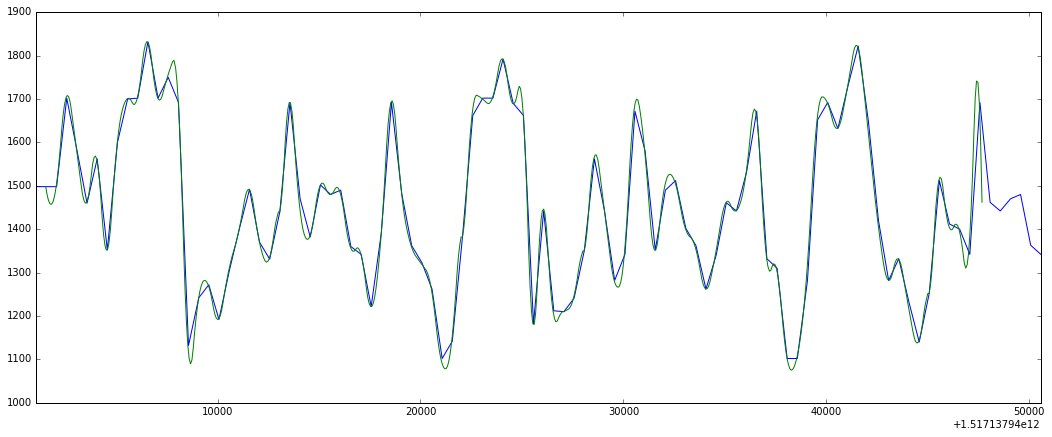

In [8]:
steering = pd.Series(values_rc[:100], index=timestamps[rc_topic][:100])
steering_reindexed = steering.reindex(index=timestamps[camera_topic][:700], method='bfill', limit=1)
steering_interpolated =  steering_reindexed.interpolate(method='spline', order=2)
plt.figure(figsize=(18, 7))
_ =steering.plot()
_ =steering_interpolated.plot()